# Introduction

- The project was accomplished by delivering 2 sub-projects.
  - Part 1 deploys a **neural network to build a regressor & classifier** respectively for a communications equipment manufacturer. The model predicts the equipment’s signal quality using various parameters from its products, which is responsible for emitting informative signals.
  - Part 2 delivers an **image classifier**, which can **classify numbers** from the photographs captured at street level using a Neural Network”

# **Part A**

# 1. Data import and Understanding

### 1. A. Read the ‘Signals.csv’ as DataFrame and import required libraries.

In [ ]:
import warnings

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
d1 = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Project_Data/Signals.csv")
d1.head(1)

,Parameter 1,Parameter 2,Parameter 3,Parameter 4,Parameter 5,Parameter 6,Parameter 7,Parameter 8,Parameter 9,Parameter 10,Parameter 11,Signal_Strength
0,7.4,0.7,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [ ]:
d1.shape

(1599, 12)

In [ ]:
d1.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Columns: 12 entries, Parameter 1 to Signal_Strength
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


- There are 1599 rows and 12 columns
- There are 11 independent features and 1 output column namely "Signal_Strength"

### 1. B. Check for missing values and print percentage for each attribute

In [ ]:
d1.isnull().sum()

Parameter 1        0
Parameter 2        0
Parameter 3        0
Parameter 4        0
Parameter 5        0
Parameter 6        0
Parameter 7        0
Parameter 8        0
Parameter 9        0
Parameter 10       0
Parameter 11       0
Signal_Strength    0
dtype: int64

#### There are no missing values in any of the columns.

### 1. C. Check for presence of duplicate records in the dataset and impute with appropriate method.

In [ ]:
d1.duplicated().sum()

240

- There are 240 duplicate rows which can be dropped off.

In [ ]:
d1.drop_duplicates(inplace=True)

In [ ]:
d1.shape

(1359, 12)

- After removing 240 duplicate rows, 1359 data points are remaining

### Duplicate rows have been dropped. Let us reset the indexes as well.

In [ ]:
d1.reset_index(inplace = True,drop=True)

### 1. D. Visualise distribution of the target variable

In [ ]:
d1.value_counts("Signal_Strength")

Signal_Strength
5    577
6    535
7    167
4     53
8     17
3     10
dtype: int64

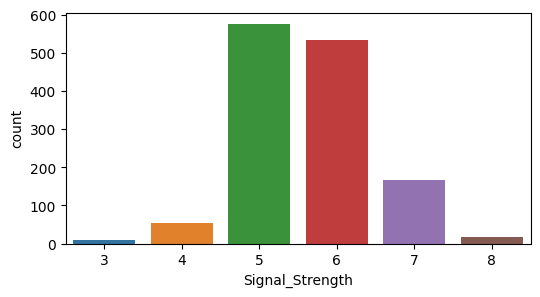

In [ ]:
plt.figure(figsize= (6,3))
sns.countplot(data=d1, x='Signal_Strength');

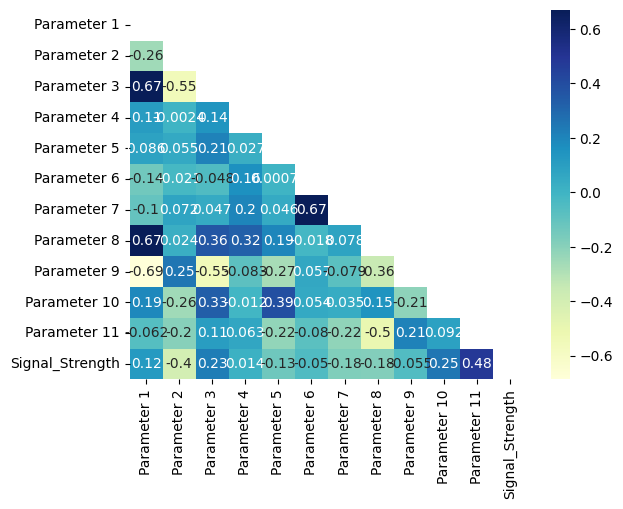

In [ ]:
corr= d1.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, cmap='YlGnBu', mask=matrix);

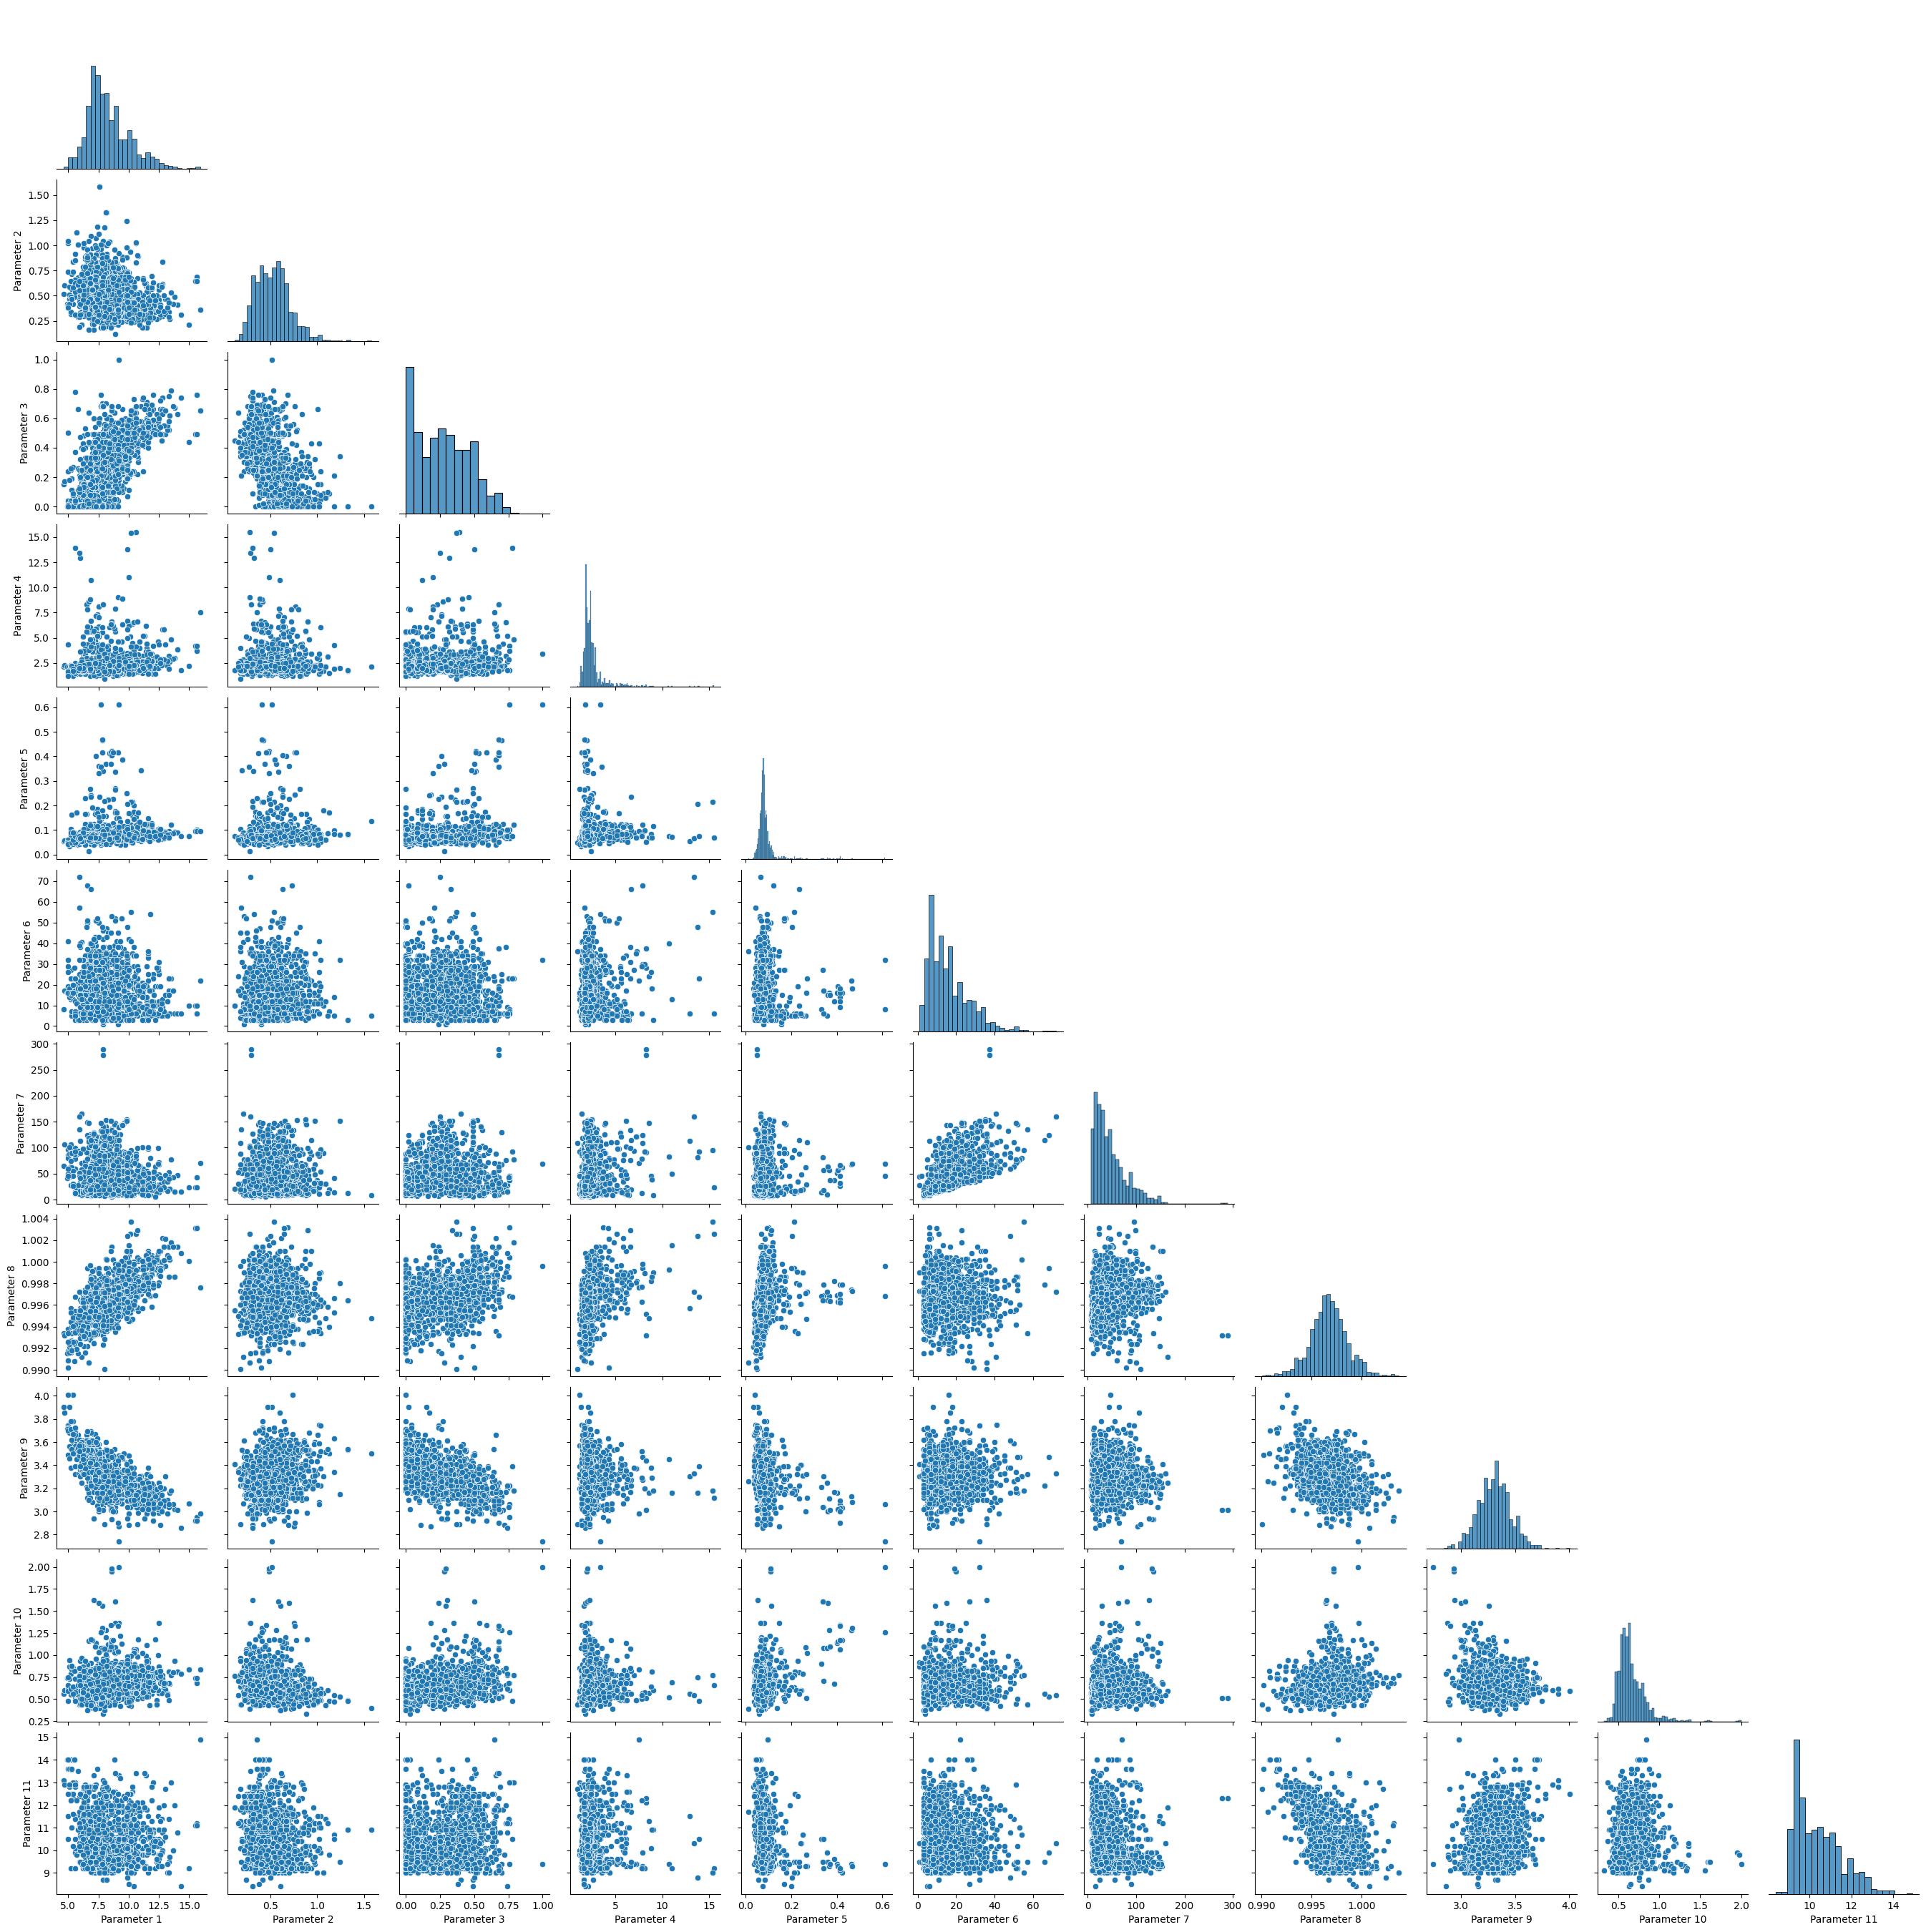

In [ ]:
sns.pairplot(data=d1.loc[:,d1.columns != "Signal_Strength"], corner=True);

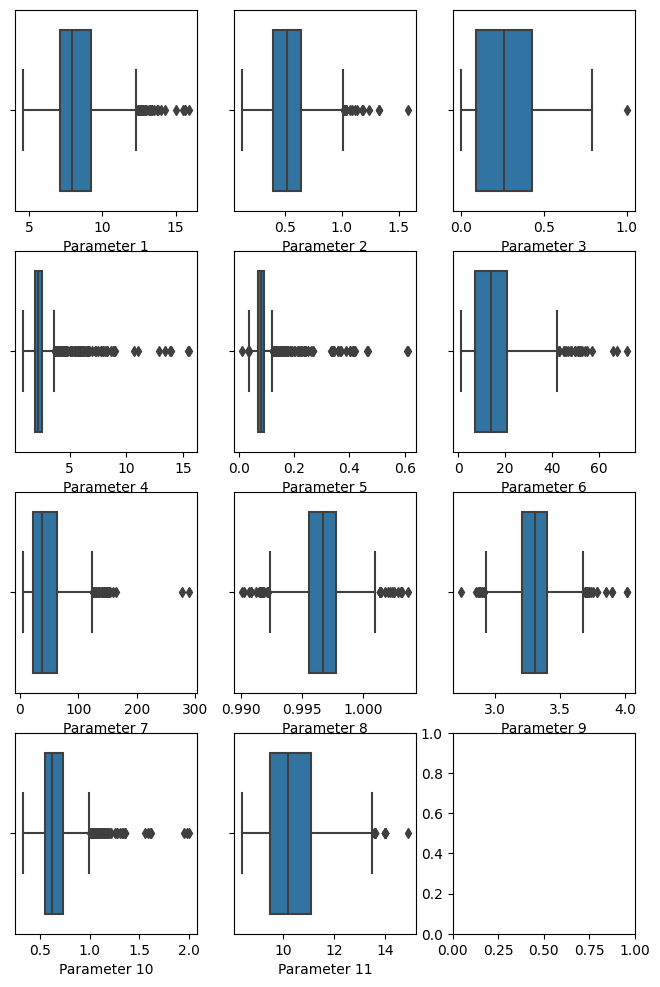

In [ ]:
f, ax = plt.subplots(4, 3, figsize=(8,12))    #12, 16
index=0
for i in range(4):
  for j in range(3):
    col = d1.columns[index]
    index += 1
    if (index == 12):
      break;          # Do not print box plot for the output variable i.e. Signal_Strength
    sns.boxplot(x= col, data=d1,  ax=ax[i,j])

### 1. E. Share insights from the initial data analysis (at least 2).

- Data is imbalanced. 2 categories have more than 500 records and other 2 categories have records less than 20.
- Few features are correlated such as Parameter 3/8/9 and Parameter 1, parameter 6 & parameter 7
- There are outliers. Parameter 4 & 5 are highly right skewed.


# 2. Data preprocessing

### 2. A. Split the data into X & Y.

In [ ]:
X = d1.drop(['Signal_Strength'], axis=1)
y = d1['Signal_Strength']

### 2. B. Split the data into train & test with 70:30 proportion.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y )

### 2. C. Print shape of all the 4 variables and verify if train and test data is in sync.

In [ ]:
print("X_train.shape : ", X_train.shape)
print("y_train.shape : ", y_train.shape)
print("X_test.shape : ", X_test.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (951, 11)
y_train.shape :  (951,)
X_test.shape :  (408, 11)
y_test.shape :  (408,)


In [ ]:
y_train.value_counts()


5    404
6    374
7    117
4     37
8     12
3      7
Name: Signal_Strength, dtype: int64

In [ ]:
y_test.value_counts()

5    173
6    161
7     50
4     16
8      5
3      3
Name: Signal_Strength, dtype: int64

#### Let us print the category wise value counts in percentage.

In [ ]:
(y_train.value_counts() / y_train.shape[0] * 100).round(2)

5    42.48
6    39.33
7    12.30
4     3.89
8     1.26
3     0.74
Name: Signal_Strength, dtype: float64

In [ ]:
(y_test.value_counts() / y_test.shape[0] * 100).round(2)

5    42.40
6    39.46
7    12.25
4     3.92
8     1.23
3     0.74
Name: Signal_Strength, dtype: float64

- The train and test data has been split in the ration of 70:30
- Class distribution is also equal between the training and test data, due to the "stratify" parameter in the train_test_split() function.

### 2. D. Normalise the train and test data with appropriate method

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train_sc = sc.fit_transform(X_train)
x_test_sc = sc.transform(X_test)

- The data has been scaled now. Let us visualize the data.

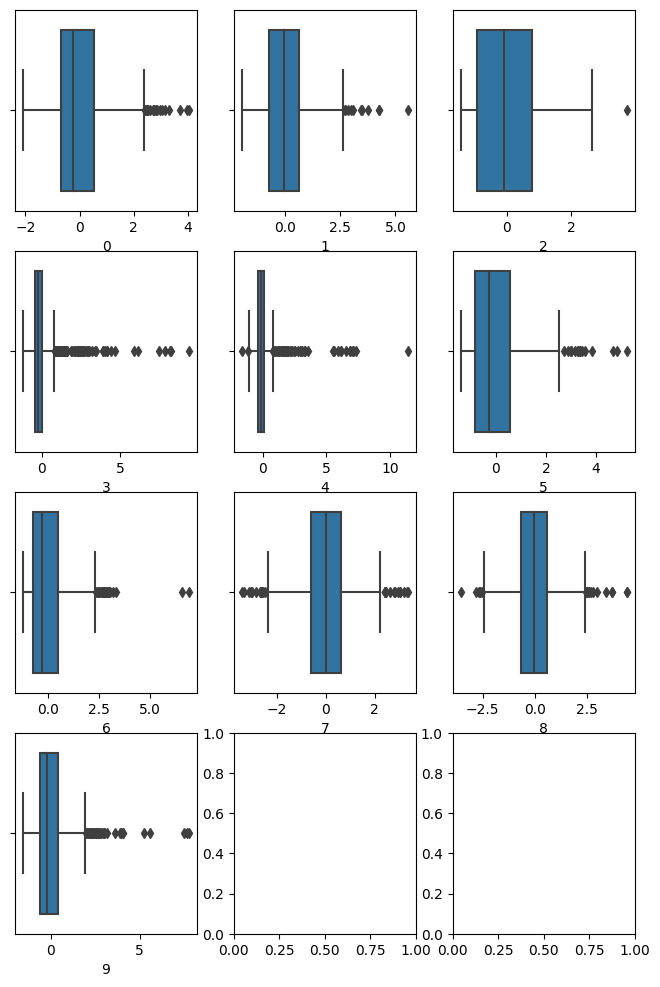

In [ ]:
f, ax = plt.subplots(4, 3, figsize=(8,12))    #12, 16
index=0
for i in range(4):
  for j in range(3):
    col = pd.DataFrame(x_train_sc).columns[index]
    index += 1
    if (index == 11):
      break;
    sns.boxplot(x= col, data=pd.DataFrame(x_train_sc),  ax=ax[i,j])

### 2. E. Transform Labels into format acceptable by Neural Network

- The values of output variable, "signal Strength", are between 3 to 8
- Let us convert these values to a range between 0 to 5
- If the conversion is not done, one-hot encoding will create 9 columns for each value, instead of 6 columns. This is because the highest value in the output column is 8.

In [ ]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

y_train_temp = labelencoder.fit_transform(y_train)
y_test = labelencoder.transform(y_test)

print(pd.DataFrame(y_train).value_counts())
print(pd.DataFrame(y_train_temp).value_counts())

Signal_Strength
5                  404
6                  374
7                  117
4                   37
8                   12
3                    7
dtype: int64
2    404
3    374
4    117
1     37
5     12
0      7
dtype: int64


- The range of output classes has been changed from 3-8 to 0-5
- Now let us change it to one-hot encoding

In [ ]:
from keras.utils import to_categorical

num_classes = 6
y_train = to_categorical(y_train_temp, num_classes)
y_train[:5]

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.]], dtype=float32)

# 3. Model Training & Evaluation using Neural Network

### 3. A. Design a Neural Network to train a classifier.

In [ ]:
from keras import backend
import tensorflow as tf

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras import losses
from keras import optimizers
from keras import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(8, activation='relu',kernel_initializer='he_uniform',input_shape=(11,)))

model.add(Dense(num_classes, activation='softmax')) ### For multiclass classification Softmax is used

In [ ]:
adam = optimizers.Adam(learning_rate= 0.001)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 96        
                                                                 
 dense_1 (Dense)             (None, 6)                 54        
                                                                 
Total params: 150 (600.00 Byte)
Trainable params: 150 (600.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 3. B. Train the classifier using previously designed Architecture

In [ ]:
history=model.fit(x_train_sc, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=2)

Epoch 1/50
24/24 - 1s - loss: 1.9194 - accuracy: 0.1750 - val_loss: 1.8073 - val_accuracy: 0.2147 - 1s/epoch - 44ms/step
Epoch 2/50
24/24 - 0s - loss: 1.7791 - accuracy: 0.2066 - val_loss: 1.6811 - val_accuracy: 0.2565 - 73ms/epoch - 3ms/step
Epoch 3/50
24/24 - 0s - loss: 1.6702 - accuracy: 0.2526 - val_loss: 1.5856 - val_accuracy: 0.2880 - 89ms/epoch - 4ms/step
Epoch 4/50
24/24 - 0s - loss: 1.5873 - accuracy: 0.2934 - val_loss: 1.5118 - val_accuracy: 0.3298 - 73ms/epoch - 3ms/step
Epoch 5/50
24/24 - 0s - loss: 1.5208 - accuracy: 0.3289 - val_loss: 1.4541 - val_accuracy: 0.3455 - 76ms/epoch - 3ms/step
Epoch 6/50
24/24 - 0s - loss: 1.4667 - accuracy: 0.3487 - val_loss: 1.4061 - val_accuracy: 0.3822 - 82ms/epoch - 3ms/step
Epoch 7/50
24/24 - 0s - loss: 1.4211 - accuracy: 0.3592 - val_loss: 1.3654 - val_accuracy: 0.3717 - 70ms/epoch - 3ms/step
Epoch 8/50
24/24 - 0s - loss: 1.3807 - accuracy: 0.3934 - val_loss: 1.3302 - val_accuracy: 0.4031 - 81ms/epoch - 3ms/step
Epoch 9/50
24/24 - 0s - l

### 3. C. Plot 2 separate visuals.
-  Training Loss and Validation Loss
-  Training Accuracy and Validation Accuracy

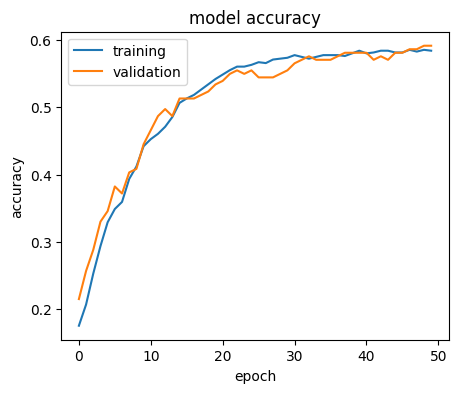

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

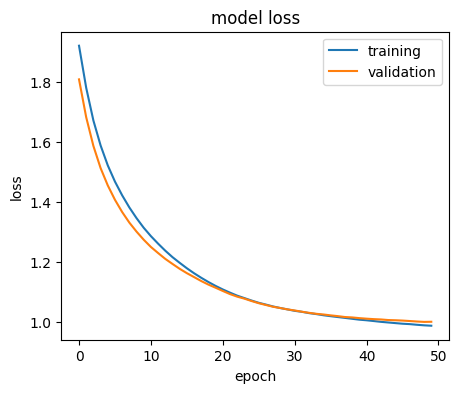

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

### Let us predict on the test data

In [ ]:
y_pred=model.predict(x_test_sc)

13/13 [==============================] - 0s 2ms/step


In [ ]:
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))   #, labels=np.unique(y_pred_final)))   # To remove the warning
# https://stackoverflow.com/questions/43162506/undefinedmetricwarning-f-score-is-ill-defined-and-being-set-to-0-0-in-labels-wi

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        16
           2       0.55      0.80      0.65       173
           3       0.49      0.36      0.42       161
           4       0.51      0.38      0.44        50
           5       0.00      0.00      0.00         5

    accuracy                           0.53       408
   macro avg       0.26      0.26      0.25       408
weighted avg       0.49      0.53      0.49       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


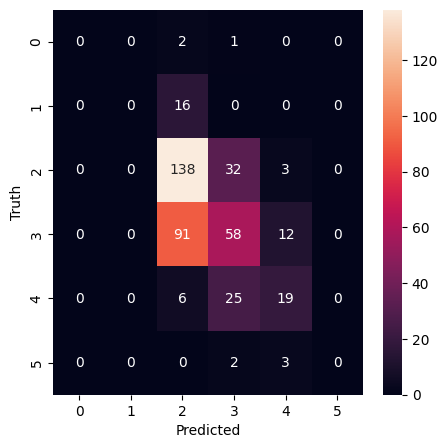

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### 3. D. Design new architecture/update existing architecture in attempt to improve the performance of the model.

### Model 2 -
- Add more hidden layers / add more neurons

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
model = Sequential()

model.add(Dense(32,activation='relu',kernel_initializer='he_uniform',input_shape = (11,)))
model.add(Dense(num_classes, activation = 'softmax'))

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_sc, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
24/24 [==============================] - 1s 10ms/step - loss: 1.8195 - accuracy: 0.3434 - val_loss: 1.5375 - val_accuracy: 0.4241
Epoch 2/20
24/24 [==============================] - 0s 7ms/step - loss: 1.5817 - accuracy: 0.4000 - val_loss: 1.3786 - val_accuracy: 0.4503
Epoch 3/20
24/24 [==============================] - 0s 3ms/step - loss: 1.4245 - accuracy: 0.4632 - val_loss: 1.2685 - val_accuracy: 0.4974
Epoch 4/20
24/24 [==============================] - 0s 3ms/step - loss: 1.3221 - accuracy: 0.5026 - val_loss: 1.1913 - val_accuracy: 0.5026
Epoch 5/20
24/24 [==============================] - 0s 4ms/step - loss: 1.2477 - accuracy: 0.5342 - val_loss: 1.1389 - val_accuracy: 0.5183
Epoch 6/20
24/24 [==============================] - 0s 4ms/step - loss: 1.1979 - accuracy: 0.5461 - val_loss: 1.1007 - val_accuracy: 0.5288
Epoch 7/20
24/24 [==============================] - 0s 4ms/step - loss: 1.1606 - accuracy: 0.5632 - val_loss: 1.0725 - val_accuracy: 0.5340
Epoch 8/20
24/24 [=

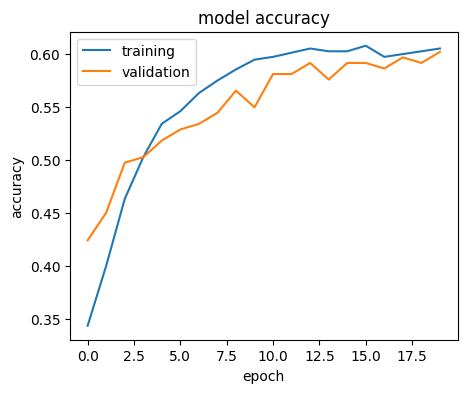

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

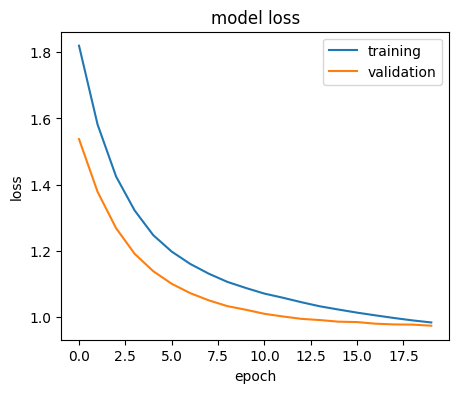

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
y_pred=model.predict(x_test_sc)

13/13 [==============================] - 0s 2ms/step


In [ ]:
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        16
           2       0.62      0.75      0.68       173
           3       0.53      0.58      0.55       161
           4       0.61      0.28      0.38        50
           5       0.00      0.00      0.00         5

    accuracy                           0.58       408
   macro avg       0.29      0.27      0.27       408
weighted avg       0.55      0.58      0.55       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Increasing the number of neurons has improved the accuracy from **53%** to **58%**.
- Adding more layers does not seem to have improved the accuracy above 58%.

### Let us use the Regularization techniques.

### Model 3 -
-  Add Dropout layer.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.layers import Dropout

model = Sequential()

model.add(Dense(32,activation='relu',kernel_initializer='he_uniform',input_shape = (11,)))
model.add(Dropout(0.2))
model.add(Dense(num_classes, activation = 'softmax'))

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_sc, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
24/24 [==============================] - 1s 17ms/step - loss: 1.9058 - accuracy: 0.3263 - val_loss: 1.5542 - val_accuracy: 0.4346
Epoch 2/20
24/24 [==============================] - 0s 5ms/step - loss: 1.7010 - accuracy: 0.3842 - val_loss: 1.3962 - val_accuracy: 0.4764
Epoch 3/20
24/24 [==============================] - 0s 5ms/step - loss: 1.5606 - accuracy: 0.4171 - val_loss: 1.2858 - val_accuracy: 0.4921
Epoch 4/20
24/24 [==============================] - 0s 5ms/step - loss: 1.4283 - accuracy: 0.4474 - val_loss: 1.2097 - val_accuracy: 0.5079
Epoch 5/20
24/24 [==============================] - 0s 5ms/step - loss: 1.3507 - accuracy: 0.4947 - val_loss: 1.1598 - val_accuracy: 0.5131
Epoch 6/20
24/24 [==============================] - 0s 6ms/step - loss: 1.3387 - accuracy: 0.5053 - val_loss: 1.1182 - val_accuracy: 0.5236
Epoch 7/20
24/24 [==============================] - 0s 5ms/step - loss: 1.2910 - accuracy: 0.5303 - val_loss: 1.0887 - val_accuracy: 0.5393
Epoch 8/20
24/24 [=

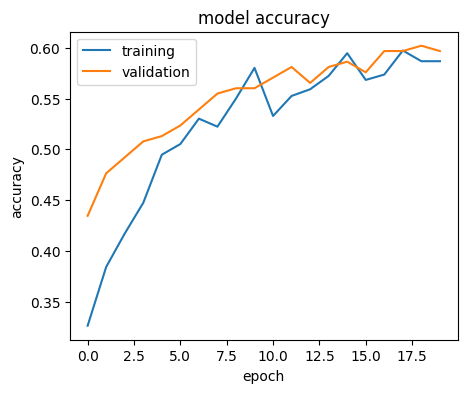

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

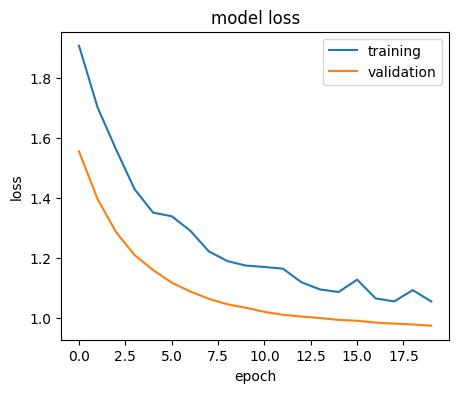

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
y_pred=model.predict(x_test_sc)

13/13 [==============================] - 0s 2ms/step


In [ ]:
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        16
           2       0.62      0.75      0.68       173
           3       0.54      0.61      0.57       161
           4       0.71      0.24      0.36        50
           5       0.00      0.00      0.00         5

    accuracy                           0.59       408
   macro avg       0.31      0.27      0.27       408
weighted avg       0.56      0.59      0.56       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### With Dropouts, the accuracy has improved even further from 58% to **59%**.

### Model 4 -
-  Add BatchNormalization layer.

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras.layers import BatchNormalization,Input

model = Sequential()

model.add(Input(shape=(11,)))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu',kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(num_classes, activation = 'softmax'))

optimizer = tf.keras.optimizers.Adam(0.001)
model.compile(loss=losses.categorical_crossentropy,optimizer=optimizer,metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_sc, y_train, validation_split=0.2, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
24/24 [==============================] - 1s 14ms/step - loss: 2.3119 - accuracy: 0.1500 - val_loss: 1.6347 - val_accuracy: 0.3822
Epoch 2/20
24/24 [==============================] - 0s 5ms/step - loss: 1.9753 - accuracy: 0.2487 - val_loss: 1.5115 - val_accuracy: 0.4293
Epoch 3/20
24/24 [==============================] - 0s 4ms/step - loss: 1.7731 - accuracy: 0.3066 - val_loss: 1.4097 - val_accuracy: 0.4555
Epoch 4/20
24/24 [==============================] - 0s 5ms/step - loss: 1.6020 - accuracy: 0.4013 - val_loss: 1.3262 - val_accuracy: 0.5026
Epoch 5/20
24/24 [==============================] - 0s 5ms/step - loss: 1.4553 - accuracy: 0.4776 - val_loss: 1.2643 - val_accuracy: 0.5288
Epoch 6/20
24/24 [==============================] - 0s 4ms/step - loss: 1.3788 - accuracy: 0.4974 - val_loss: 1.2149 - val_accuracy: 0.5340
Epoch 7/20
24/24 [==============================] - 0s 4ms/step - loss: 1.3230 - accuracy: 0.5329 - val_loss: 1.1737 - val_accuracy: 0.5340
Epoch 8/20
24/24 [=

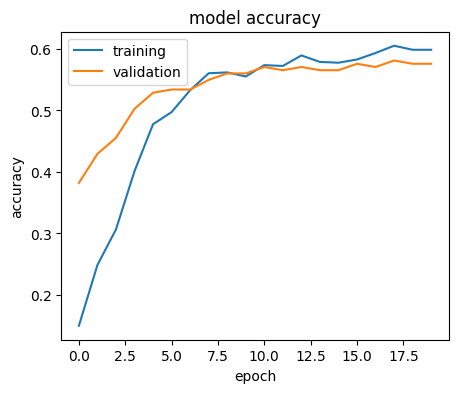

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

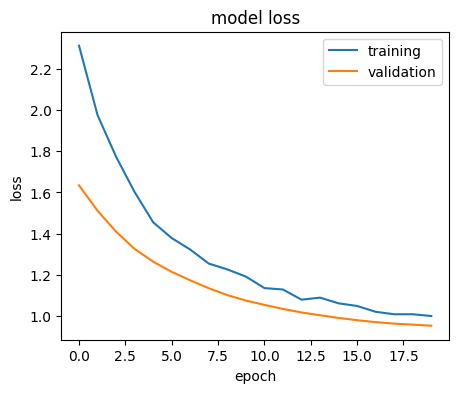

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

In [ ]:
y_pred=model.predict(x_test_sc)

13/13 [==============================] - 0s 2ms/step


In [ ]:
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_final))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.00      0.00      0.00        16
           2       0.62      0.73      0.67       173
           3       0.53      0.58      0.56       161
           4       0.57      0.34      0.42        50
           5       0.00      0.00      0.00         5

    accuracy                           0.58       408
   macro avg       0.29      0.27      0.28       408
weighted avg       0.54      0.58      0.56       408



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### BatchNormalization also gives the same performance as **58%** of accuracy.

#### So far, Dropouts have given the highest accuracy of **59%**.

### Let us tune the hyperparameters.

### Model 5 -
 - RandomSearch using KerasClassifier()

In [ ]:
!pip install scikeras[tensorflow]

In [ ]:
from scikeras.wrappers import KerasClassifier

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v4(batch_size=32,lr=0.001):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(32,activation='relu',kernel_initializer='he_uniform', input_dim = 11))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = losses.categorical_crossentropy, metrics = ['accuracy'])
    return model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=1,batch_size=32, lr=0.001)
# define the grid search parameters
param_random = {
    'batch_size':[32, 64, 128],
    "lr":[0.01,0.001,0.003],}

kfold_splits = 3
random= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=param_random,n_jobs=-1)

In [ ]:
random_result = random.fit(x_train_sc, y_train,validation_split=0.2,verbose=0)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
# Summarize results
print("Best: %f using %s" % (random_result.best_score_, random_result.best_params_))

Best: 0.538381 using {'lr': 0.01, 'batch_size': 32}


In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
estimator_v4=create_model_v4(batch_size=random_result.best_params_['batch_size'],lr=random_result.best_params_['lr'])

In [ ]:
history_4=estimator_v4.fit(X_train, y_train, epochs=30, batch_size = random_result.best_params_['batch_size'], verbose=0,validation_split=0.2)

In [ ]:
y_pred=estimator_v4.predict(x_test_sc)
y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_final))

13/13 [==============================] - 0s 2ms/step
0.4534313725490196


- The accuracy is very low.
- Let us try GridSearchCV.

### Model 6
- Let's use GridSearchCV

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v4(batch_size=32,lr=0.001):
    np.random.seed(1337)
    model = Sequential()
    model.add(Dense(32,activation='relu',kernel_initializer='he_uniform', input_dim = 11))
    model.add(Dropout(0.2))
    model.add(Dense(num_classes, activation='softmax'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = losses.categorical_crossentropy, metrics = ['accuracy'])
    return model

In [ ]:
from sklearn.model_selection import GridSearchCV

keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=0,lr=0.001,batch_size=32)
# define the grid search parameters
param_grid = {
    'batch_size':[32, 64],
    "lr":[0.01,0.003],}

kfold_splits = 3
grid= GridSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_grid=param_grid,n_jobs=-1)

In [ ]:
grid_result = grid.fit(x_train_sc, y_train,validation_split=0.2,verbose=0)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.562566 using {'batch_size': 32, 'lr': 0.01}


In [ ]:
estimator_v4=create_model_v4(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

In [ ]:
history = estimator_v4.fit(x_train_sc, y_train, epochs=30, batch_size = grid_result.best_params_['batch_size'], verbose=0,validation_split=0.2)

In [ ]:
y_pred=estimator_v4.predict(x_test_sc)

y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_final).round(2))

13/13 [==============================] - 0s 4ms/step
0.59


### 3. E. Plot visuals as in Q3.C and share insights about difference observed in both the models.

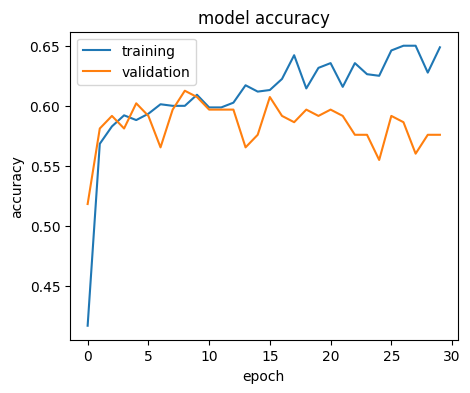

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

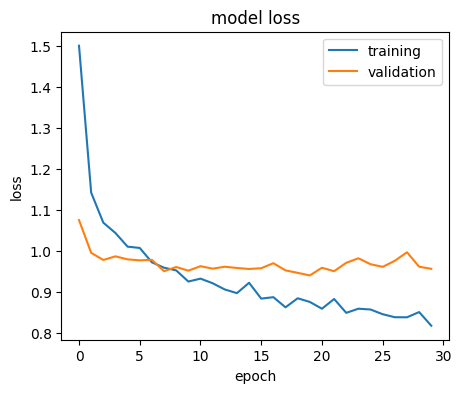

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

- GridSearchCV estimated best leraning rate as **0.01**. Earlier we used learning rate as 0.001
- The accuracy is same though, **0.59**.
- This is the maximum accuracy achived after adding the Dropout layer.

# **Part B**

# 1. Data Import and Exploration

## 1. A. Read the .h5 file and assign to a variable.

In [ ]:
import h5py
f = h5py.File('/content/gdrive/MyDrive/Colab Notebooks/Project_Data/Autonomous_Vehicles_SVHN_single_grey1.h5', 'r')

## 1. B. Print all the keys from the .h5 file.

In [ ]:
list(f.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

## 1. C. Split the data into X_train, X_test, Y_train, Y_test

In [ ]:
X_train = f['X_train'][:]
X_test = f['X_test'][:]
X_val = f['X_val'][:]
y_train = f['y_train'][:]
y_test = f['y_test'][:]
y_val = f['y_val'][:]

# 2. Data Visualisation and preprocessing

## 2. A. Print shape of all the 4 data split into x, y, train, test to verify if x & y is in sync.

In [ ]:
print(f"{'X_train':<8}: {X_train.shape}")
print(f"{'X_test':<8}: {X_test.shape}")
print(f"{'X_val':<8}: {X_val.shape}\n")
print(f"{'y_train':<8}: {y_train.shape}")
print(f"{'y_test':<8}: {y_test.shape}")
print(f"{'y_val':<8}: {y_val.shape}")

X_train : (42000, 32, 32)
X_test  : (18000, 32, 32)
X_val   : (60000, 32, 32)

y_train : (42000,)
y_test  : (18000,)
y_val   : (60000,)


## 2. B. Visualise first 10 images in train data and print its corresponding labels

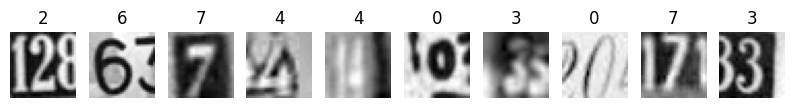

In [ ]:
plt.figure(figsize=(10, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(X_train[i], cmap="gray")
    plt.axis('off')
    plt.title(y_train[i])
plt.show();

## 2. C. Reshape all the images with appropriate shape update the data in same variable.

In [ ]:
X_train = pd.DataFrame(X_train.reshape((X_train.shape[0], -1)))
X_test = pd.DataFrame(X_test.reshape((X_test.shape[0], -1)))
X_val = pd.DataFrame(X_val.reshape((X_val.shape[0], -1)))
y_train = pd.DataFrame(y_train.reshape((y_train.shape[0], -1)))
y_test = pd.DataFrame(y_test.reshape((y_test.shape[0], -1)))
y_val = pd.DataFrame(y_val.reshape((y_val.shape[0], -1)))

In [ ]:
print(f"{'X_train':<8}: {X_train.shape}")
print(f"{'X_test':<8}: {X_test.shape}")
print(f"{'X_val':<8}: {X_val.shape}\n")
print(f"{'y_train':<8}: {y_train.shape}")
print(f"{'y_test':<8}: {y_test.shape}")
print(f"{'y_val':<8}: {y_val.shape}")

X_train : (42000, 1024)
X_test  : (18000, 1024)
X_val   : (60000, 1024)

y_train : (42000, 1)
y_test  : (18000, 1)
y_val   : (60000, 1)


- All images have been reshaped from (32, 32) to 1024 using numpy's reshape function.

## 2. D. Normalise the images i.e. Normalise the pixel values

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255.0
X_test = X_test / 255.0
X_val = X_val / 255.0

## 2. F. Print total Number of classes in the Dataset

In [ ]:
print("Total number of classes in the dataset are ",y_train.nunique()[0])

Total number of classes in the dataset are  10


## 2. E. Transform Labels into format acceptable by Neural Network

In [ ]:
from keras.utils import to_categorical

num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_train[:5]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

# 3. Model Training & Evaluation using Neural Network

## 3. A. Design a Neural Network to train a classifier.

In [ ]:
from keras import backend
import tensorflow as tf

backend.clear_session()
#Fixing the seed for random number generators so that we can ensure we receive the same output everytime
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
from keras import losses
from keras import optimizers
from keras import Sequential
from keras.layers import Dense

model = Sequential()

model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(X_train.shape[1],)))
model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
model.add(Dense(num_classes, activation='softmax'))

adam = optimizers.Adam(learning_rate= 0.001)
model.compile(loss=losses.categorical_crossentropy, optimizer=adam, metrics=['accuracy'])

In [ ]:
history=model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64, verbose=2)

Epoch 1/30
525/525 - 10s - loss: 2.3082 - accuracy: 0.1037 - val_loss: 2.3049 - val_accuracy: 0.1014 - 10s/epoch - 19ms/step
Epoch 2/30
525/525 - 5s - loss: 2.2699 - accuracy: 0.1204 - val_loss: 2.1051 - val_accuracy: 0.1905 - 5s/epoch - 10ms/step
Epoch 3/30
525/525 - 4s - loss: 1.7804 - accuracy: 0.3488 - val_loss: 1.6237 - val_accuracy: 0.4555 - 4s/epoch - 8ms/step
Epoch 4/30
525/525 - 5s - loss: 1.3885 - accuracy: 0.5305 - val_loss: 1.3035 - val_accuracy: 0.5717 - 5s/epoch - 10ms/step
Epoch 5/30
525/525 - 5s - loss: 1.2221 - accuracy: 0.6011 - val_loss: 1.1566 - val_accuracy: 0.6315 - 5s/epoch - 9ms/step
Epoch 6/30
525/525 - 4s - loss: 1.1347 - accuracy: 0.6360 - val_loss: 1.1113 - val_accuracy: 0.6433 - 4s/epoch - 8ms/step
Epoch 7/30
525/525 - 5s - loss: 1.0687 - accuracy: 0.6615 - val_loss: 1.0390 - val_accuracy: 0.6719 - 5s/epoch - 10ms/step
Epoch 8/30
525/525 - 5s - loss: 1.0230 - accuracy: 0.6778 - val_loss: 1.0094 - val_accuracy: 0.6827 - 5s/epoch - 9ms/step
Epoch 9/30
525/525

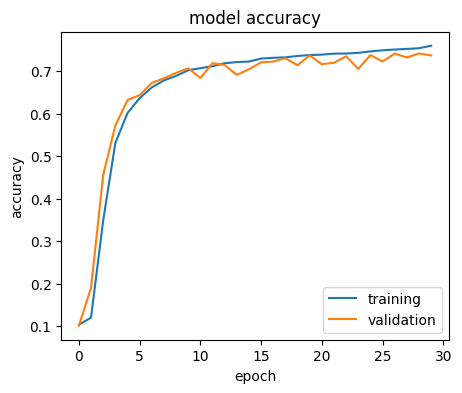

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

- We have a smooth curve for both training and validation accuracy.
- The model is not overfitted or underfitted.

In [ ]:
y_pred=model.predict(X_test)

y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_final).round(2))   #, labels=np.unique(y_pred_final)))   # To remove the warning


563/563 [==============================] - 2s 3ms/step
0.74


- The accuracy is **74%**

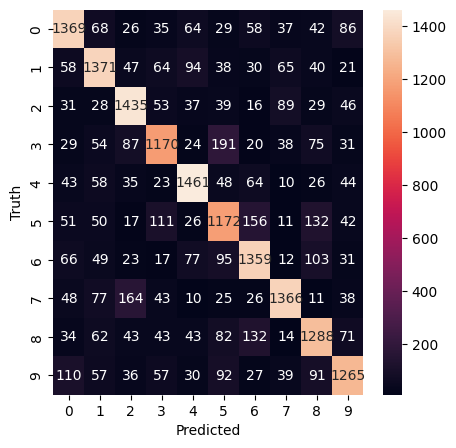

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## 3. B. Train the classifier using previously designed Architecture (Use best suitable parameters)

- Let us find best parameters using RandomisedSearch/GridSearchCV

In [ ]:
backend.clear_session()
np.random.seed(42)
import random
random.seed(42)
tf.random.set_seed(42)

In [ ]:
def create_model_v4(batch_size=32,lr=0.001):
    np.random.seed(1337)
    model = Sequential()

    model.add(Dense(256, activation='relu',kernel_initializer='he_uniform',input_shape=(X_train.shape[1],)))
    model.add(Dense(128, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(64, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(32, activation='relu',kernel_initializer='he_uniform'))
    model.add(Dense(num_classes, activation='softmax'))

    #compile model
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer = optimizer,loss = losses.categorical_crossentropy, metrics = ['accuracy'])
    return model

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

keras_estimator = KerasClassifier(build_fn=create_model_v4, verbose=0,lr=0.001,batch_size=32)

search_grid = {
    'batch_size':[32, 64,128,264],
    "lr":[0.01,0.001,0.0001,0.003],}

kfold_splits = 3
grid= RandomizedSearchCV(estimator=keras_estimator,
                    verbose=1,
                    cv=kfold_splits,
                    param_distributions=search_grid,n_jobs=-1)

In [ ]:
grid_result = grid.fit(X_train, y_train,validation_split=0.2,verbose=0)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


In [ ]:
# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.214262 using {'lr': 0.0001, 'batch_size': 32}


In [ ]:
estimator_v4=create_model_v4(batch_size=grid_result.best_params_['batch_size'],lr=grid_result.best_params_['lr'])

In [ ]:
history = estimator_v4.fit(X_train, y_train, epochs=30, batch_size = grid_result.best_params_['batch_size'], verbose=0,validation_split=0.2)

In [ ]:
y_pred=estimator_v4.predict(X_test)

y_pred_final=[]
for i in y_pred:
  y_pred_final.append(np.argmax(i))

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred_final).round(2))

563/563 [==============================] - 1s 2ms/step
0.79


- The accuracy has improved from 74% to **79%**
- The best learning rate is 0.0001. Earlier we used learning rate of 0.001

## 3. C. Evaluate performance of the model with appropriate metrics.

In [ ]:
from sklearn import metrics
cr4=metrics.classification_report(y_test,y_pred_final)
print(cr4)

              precision    recall  f1-score   support

           0       0.87      0.78      0.83      1814
           1       0.77      0.84      0.80      1828
           2       0.90      0.76      0.82      1803
           3       0.69      0.76      0.72      1719
           4       0.82      0.82      0.82      1812
           5       0.69      0.81      0.75      1768
           6       0.75      0.80      0.78      1832
           7       0.83      0.84      0.84      1808
           8       0.82      0.68      0.75      1812
           9       0.78      0.76      0.77      1804

    accuracy                           0.79     18000
   macro avg       0.79      0.79      0.79     18000
weighted avg       0.79      0.79      0.79     18000



- The accuracy is **79%**
- F1 score is also good for all the classes, it is above 70%.

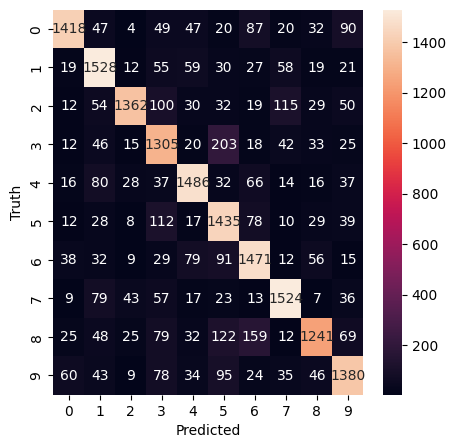

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm=confusion_matrix(y_test,y_pred_final)

plt.figure(figsize=(5,5))
sns.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

## 3. D. Plot the training loss, validation loss vs number of epochs and training accuracy, validation accuracy vs number of epochs plot and write your observations on the same.

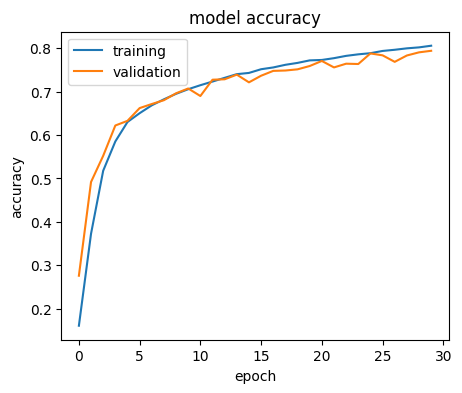

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

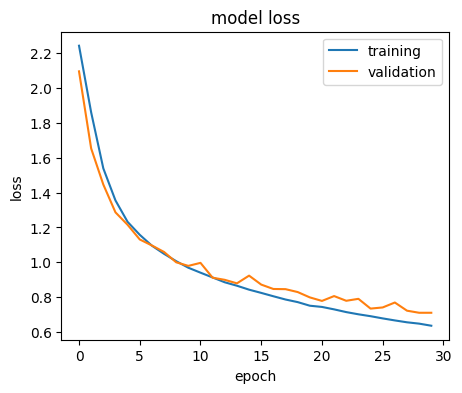

In [ ]:
fig = plt.figure(figsize=(5, 4))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

- Both the accuracy plot and loss plot shows that the model has neither been overfitted nor underfitted. Both the validation and training curve are overlapping and are smooth.
- It has also performed fairly well wih the test data with **79%** of accuracy.